# Visualizing Hierarchies

* t-SNE: Creates a 2D map of a dataset
* Hierarchial clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

data = "../datasets/unsupervised_learning/"

## eurovision scoring dataset

* Countries gave scores to songs performed at the Eurovision 2016
* 2D array of scores
* Rows are countries, columns are songs

scores can be visualised as a tree-like diagram called a **dendogram**

In [15]:
eurovision = pd.read_excel(data + "euro2017_final.xlsx", skiprows=1)
eurovision.head()

Rank Countries  Total  Albania  Austria  Belarus  Belgium  Croatia  Cyprus  \
0     1  Portugal    758       14       20       17       20       17      15   
1     2  Bulgaria    615       20       17       24       18       18      17   
2     3   Moldova    374        0        3       10        7        4       6   
3     4   Belgium    363        5       10        6        0        5       5   
4     5    Sweden    344        2        5       11       14        6      11   

   Denmark  ...  Hungary  Moldova  Armenia  Czech Republic  Georgia  \
0       15  ...       19       13       22              20       20   
1       14  ...       22       18        7              14       13   
2       11  ...       10        0       14               8        0   
3        8  ...        8        2        5               4        0   
4       24  ...        4       11        9               7        9   

   Montenegro  Azerbaijan  San Marino  Italy  Australia  
0           8          16          19     10         14  
1           8          14          14     10         13  
2           3          20           8     20         22  
3          10           4          13      9          4  
4           7           3           2     10         12  

[5 rows x 45 columns]

In [16]:
eurovision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26 non-null     int64 
 1   Countries       26 non-null     object
 2   Total           26 non-null     int64 
 3   Albania         26 non-null     int64 
 4   Austria         26 non-null     int64 
 5   Belarus         26 non-null     int64 
 6   Belgium         26 non-null     int64 
 7   Croatia         26 non-null     int64 
 8   Cyprus          26 non-null     int64 
 9   Denmark         26 non-null     int64 
 10  Estonia         26 non-null     int64 
 11  FYR Macedonia   26 non-null     int64 
 12  Finland         26 non-null     int64 
 13  France          26 non-null     int64 
 14  Germany         26 non-null     int64 
 15  Greece          26 non-null     int64 
 16  Iceland         26 non-null     int64 
 17  Ireland         26 non-null     int64 
 18  Israel      

### Hierarchial clustering
* Every country begins in a separate cluster
* At each step, the two closest clusters are merged
* Continue until all counntries in a single cluster
* This is "**agglomerative**" hierarchiacal clustering

In [17]:
samples = eurovision.iloc[:,3:].values
country_names = eurovision["Countries"].values
print(samples.shape)
print(country_names.shape)

(26, 42)
(26,)


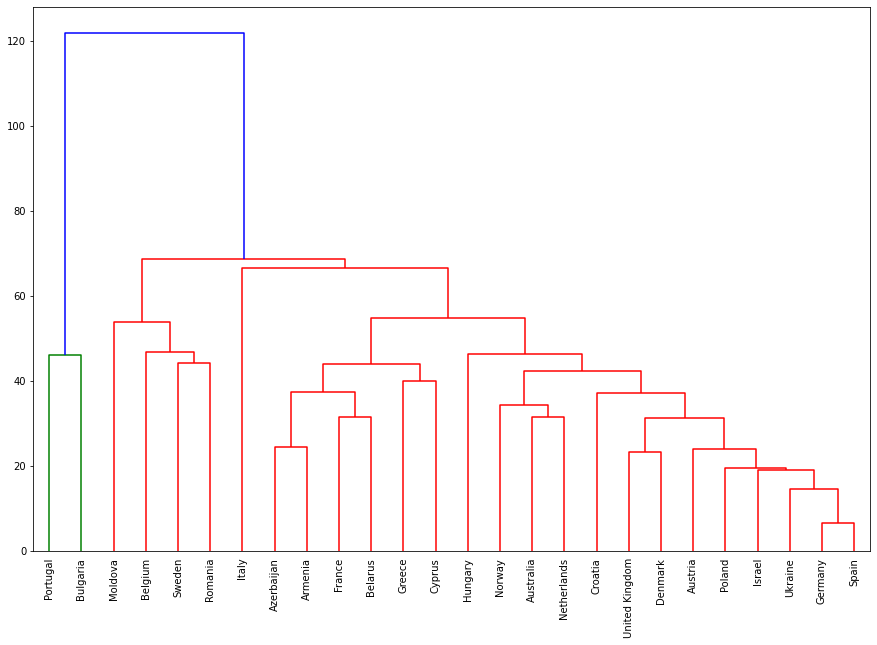

In [19]:
mergings = linkage(samples, method='complete')

plt.figure(figsize=(15, 10))
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=10)
plt.show()

In [6]:
stock_movements = pd.read_csv(data + "company-stock-movements-2010-2015-incl.csv")
stock_movements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [7]:
stock_movements.iloc[:, :6].head()

Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
0             Apple    0.580000   -0.220005   -3.409998   -1.170000   
1               AIG   -0.640002   -0.650000   -0.210001   -0.420000   
2            Amazon   -2.350006    1.260009   -2.350006   -2.009995   
3  American express    0.109997    0.000000    0.260002    0.720002   
4            Boeing    0.459999    1.770000    1.549999    2.690003   

   2010-01-08  
0    1.680011  
1    0.710001  
2    2.960006  
3    0.190003  
4    0.059997

In [8]:
companies = stock_movements.iloc[:, 0].values
movements = stock_movements.iloc[:, 1:7].values
print(f"[-] companies shape: {companies.shape}")
print(f"[-] movements shape: {movements.shape}")

[-] companies shape: (60,)
[-] movements shape: (60, 6)


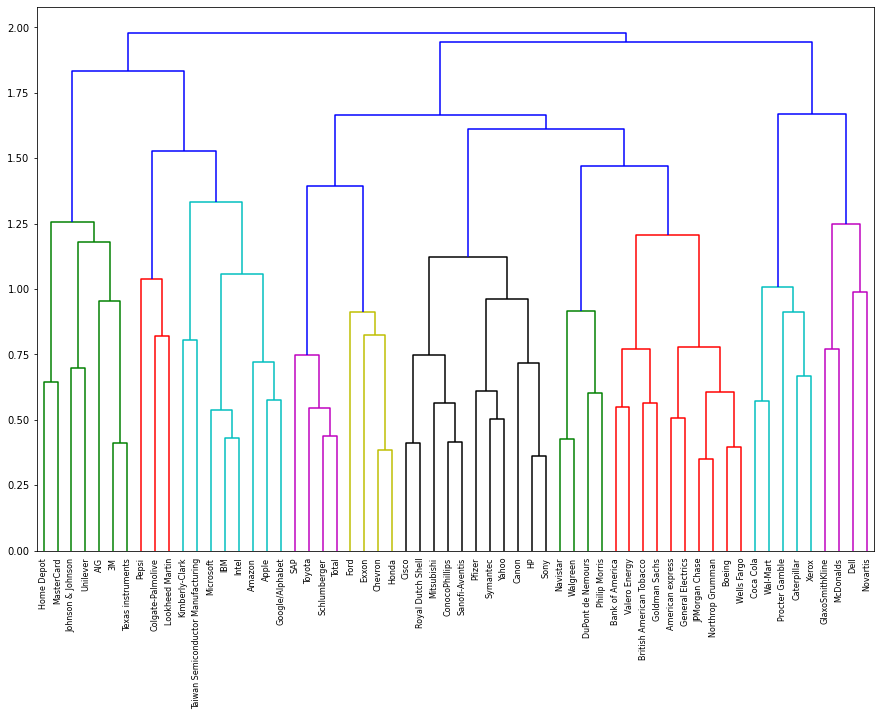

In [9]:
norm_movements = normalize(movements)

plt.figure(figsize=(15, 10))
mergings = linkage(norm_movements, method='complete')
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=8)
plt.savefig('stock_dendrogram.png')

## Cluster labels in hierarchical clustering

### Distance between clusters

* Defined by a "linkage method".
* In "complete" linkage: distance between clusters is max. distance between their samples.
* specified via method parameter, e.g. linkage(smples, method="complete")
* Different linkage method, different hierarchical clustering!

In [10]:
from scipy.cluster.hierarchy import fcluster

In [20]:
# eurovision data
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 15, criterion='distance')
print(labels)

[ 1  2  6  5  3 24  4 23 13 15 14  9 22  7 16 21 10  8 11 17 12 20 19 18
 18 18]


In [21]:
# aligning cluster labels with country names
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))

    labels       countries
0        1        Portugal
1        2        Bulgaria
4        3          Sweden
6        4         Romania
3        5         Belgium
2        6         Moldova
13       7      Azerbaijan
17       8         Armenia
11       9          France
16      10         Belarus
18      11          Greece
20      12          Cyprus
8       13       Australia
10      14     Netherlands
9       15          Norway
14      16  United Kingdom
19      17         Denmark
23      18         Ukraine
25      18           Spain
24      18         Germany
22      19          Israel
21      20          Poland
15      21         Austria
12      22         Croatia
7       23         Hungary
5       24           Italy


## t-SNE for 2-dimensional maps

* t-SNE = “t-distributed stochastic neighbor embedding”
* Maps samples to 2D space (or 3D)
* Map approximately preserves nearness of samples
* Great for inspecting datasets

In [22]:
from sklearn import datasets

In [25]:
from sklearn.manifold import TSNE

In [23]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [24]:
iris_data = iris['data']
iris_target = iris['target']
print(f"iris_data shape: {iris_data.shape}")
print(f"iris_target shape: {iris_target.shape}")

iris_data shape: (150, 4)
iris_target shape: (150,)


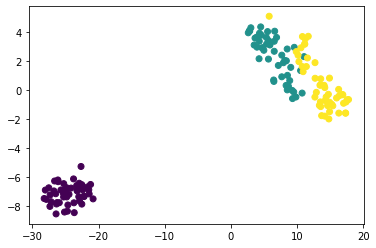

In [26]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(iris_data)
xs = transformed[:, 0]
xy = transformed[:, 1]
plt.scatter(xs, xy, c=iris_target)
plt.show()

Axes of a t-SNE plot do not have any interpretable meaning